<a href="https://colab.research.google.com/github/swordwalid/DeepLearningProject/blob/main/Cats_vs_dogs_image_classification_using_CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description: Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

#### Dataset: https://www.kaggle.com/datasets/salader/dogs-vs-cats?select=train

In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# now to unzip the downloaded data
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

## importing Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import random
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.utils import plot_model

In [ ]:
# Reading Data:

In [ ]:
os.listdir("/content/dogs_vs_cats/train/dogs")

['dog.584.jpg',
 'dog.2295.jpg',
 'dog.7266.jpg',
 'dog.1291.jpg',
 'dog.7989.jpg',
 'dog.12460.jpg',
 'dog.6908.jpg',
 'dog.10880.jpg',
 'dog.6336.jpg',
 'dog.3517.jpg',
 'dog.11805.jpg',
 'dog.1510.jpg',
 'dog.3295.jpg',
 'dog.10573.jpg',
 'dog.4623.jpg',
 'dog.6106.jpg',
 'dog.6616.jpg',
 'dog.8332.jpg',
 'dog.8152.jpg',
 'dog.11284.jpg',
 'dog.4714.jpg',
 'dog.11753.jpg',
 'dog.5883.jpg',
 'dog.2123.jpg',
 'dog.8217.jpg',
 'dog.9919.jpg',
 'dog.2338.jpg',
 'dog.6176.jpg',
 'dog.384.jpg',
 'dog.7648.jpg',
 'dog.3678.jpg',
 'dog.2416.jpg',
 'dog.681.jpg',
 'dog.4602.jpg',
 'dog.4329.jpg',
 'dog.1599.jpg',
 'dog.3103.jpg',
 'dog.8377.jpg',
 'dog.1329.jpg',
 'dog.8720.jpg',
 'dog.9362.jpg',
 'dog.1729.jpg',
 'dog.3169.jpg',
 'dog.8455.jpg',
 'dog.12424.jpg',
 'dog.1083.jpg',
 'dog.1209.jpg',
 'dog.1622.jpg',
 'dog.11540.jpg',
 'dog.2223.jpg',
 'dog.4768.jpg',
 'dog.9616.jpg',
 'dog.12450.jpg',
 'dog.11609.jpg',
 'dog.201.jpg',
 'dog.6406.jpg',
 'dog.11945.jpg',
 'dog.9949.jpg',
 'dog.1

In [ ]:
random.sample(os.listdir("/content/dogs_vs_cats/train/dogs"),5)

['dog.2390.jpg',
 'dog.2938.jpg',
 'dog.3407.jpg',
 'dog.8618.jpg',
 'dog.2521.jpg']

In [ ]:
# Now we will define a function to show some images from directory

def plot_images_from_directory(d_path,name,n_img=9):

  img_filenames=os.listdir(d_path)
  # if the number of images in that directory is less than requested, then show them all

  if len(img_filenames)<n_img:
    print(f'only found {len(img_filenames)} images in {d_path},displaying them all.')
    n_img=len(img_filenames)

  random_choosed_img=random.sample(img_filenames,n_img)
  # plotting iamges
  fig, axes = plt.subplots(3, 3, figsize=(8, 8))
  axes=axes.ravel()

  for i,img_file in enumerate(random_choosed_img):
    image_path=os.path.join(d_path,img_file)
    image=Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image: {name}")
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()






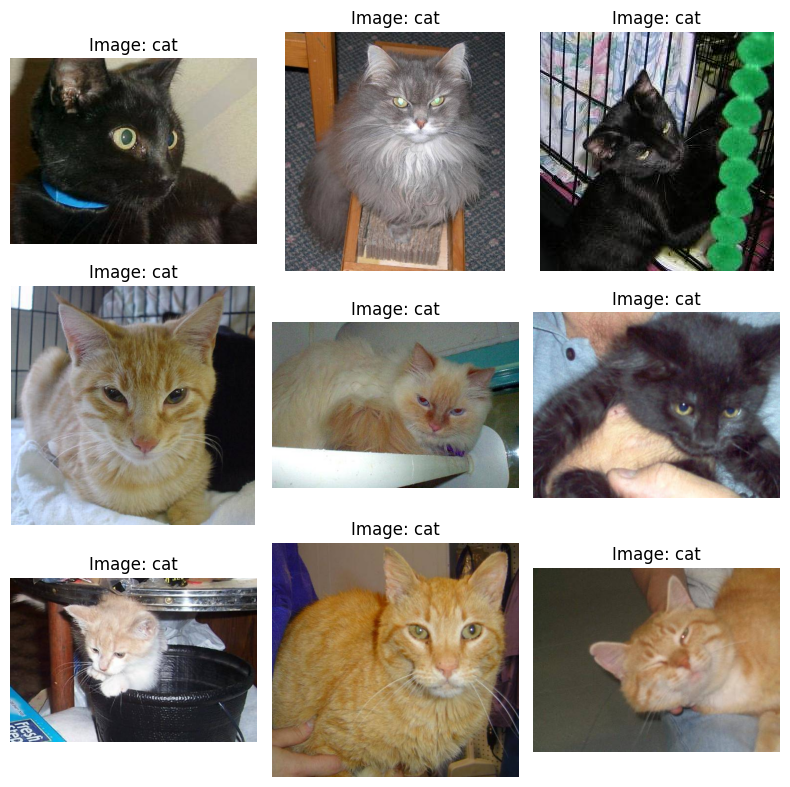

In [ ]:
directory_path="/content/dogs_vs_cats/train/cats"
plot_images_from_directory(directory_path,name="cat")

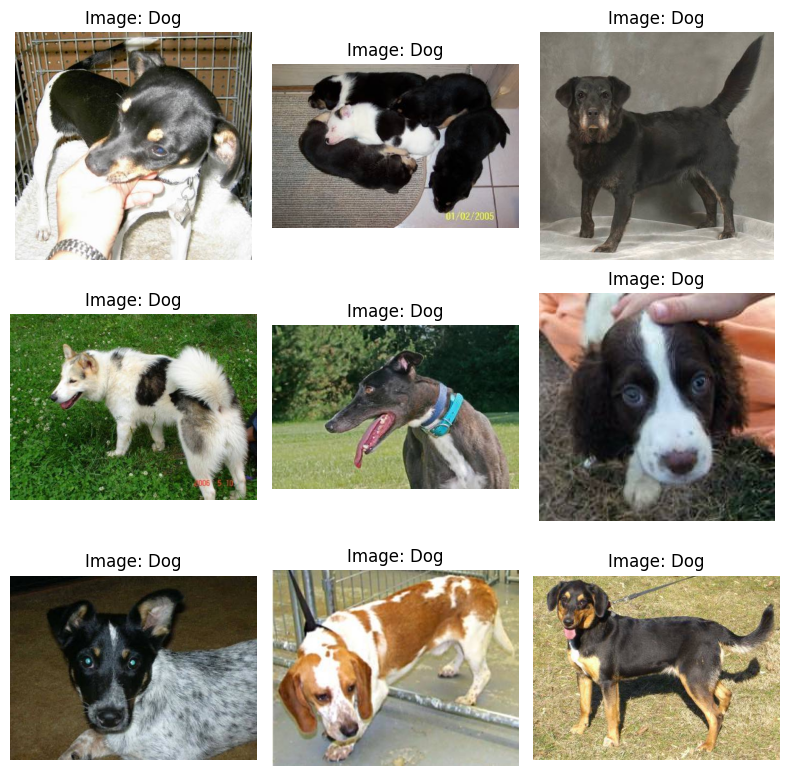

In [ ]:
dog_directory_path = '/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(dog_directory_path, name = 'Dog')

# Analysis of Data

In [ ]:
dir_name="/content/dogs_vs_cats"
cat_train="train/cats"
dog_train="train/dogs"
cat_test="test/cats"
dog_test="test/dogs"


cats_images=len(os.listdir(os.path.join(dir_name,cat_train)))+len(os.listdir(os.path.join(dir_name,cat_test)))
dogs_images=len(os.listdir(os.path.join(dir_name,dog_train)))+len(os.listdir(os.path.join(dir_name,dog_test)))
count=[cats_images,dogs_images]
print(f'Total cats image:{cats_images}')
print(f'Total dogs image:{dogs_images}')

Total cats image:12500
Total dogs image:12500


In [ ]:
len(os.listdir(os.path.join(dir_name,dog_test)))

2500

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

# fruits = ['apple', 'blueberry', 'cherry', 'orange']
# counts = [40, 100, 30, 55]
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

# ax.set_ylabel('fruit supply')
# ax.set_title('Fruit supply by kind and color')
# ax.legend(title='Fruit color')

# plt.show()

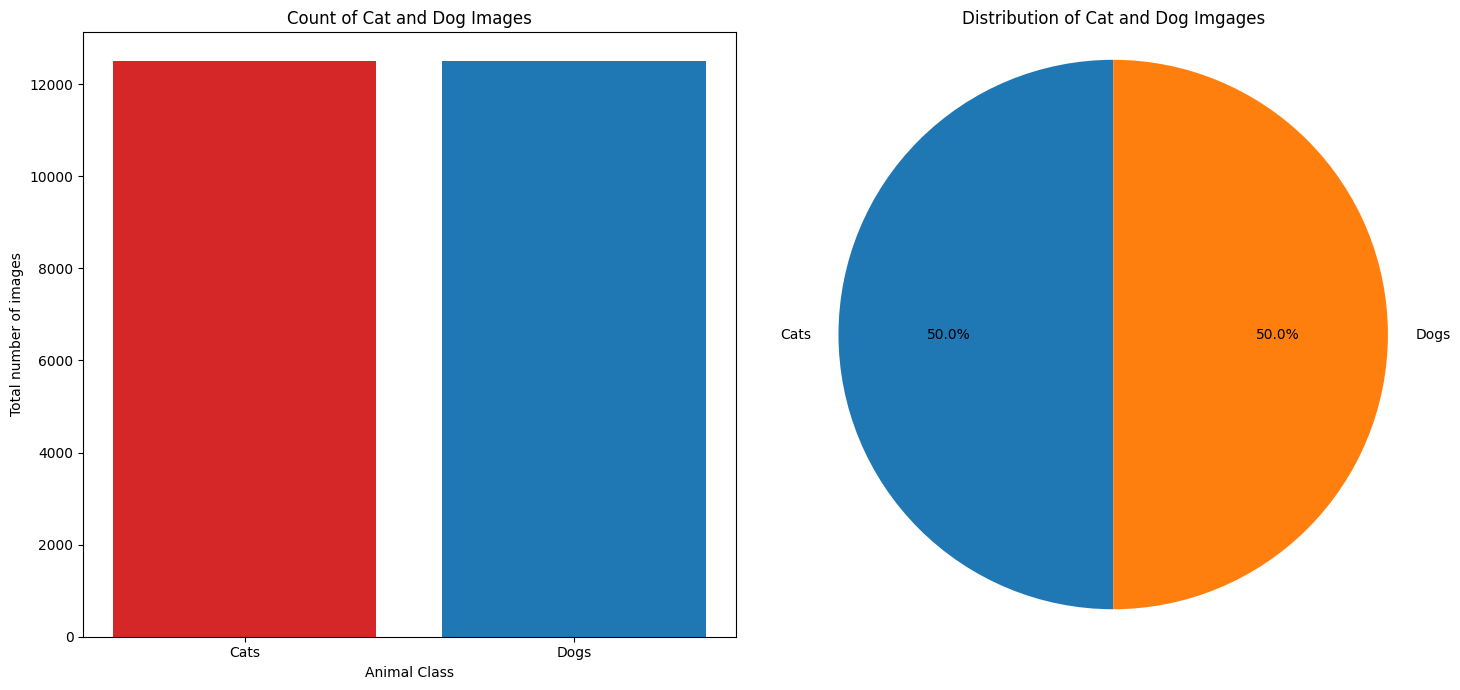

In [ ]:
# creating bar chart and pie chart

fig,ax=plt.subplots(1,2,figsize=(15,7))
animal_species=['Cats', 'Dogs']
bar_lebels=['cats','dogs']
bar_colors=['tab:red','tab:blue']
ax[0].bar(animal_species,count,label=bar_lebels,color=bar_colors)
ax[0].set_ylabel("Total number of images")
ax[0].set_xlabel('Animal Class')
ax[0].set_title('Count of Cat and Dog Images')

# pie chart
colors=['#D2DE11','#D24301']
ax[1].pie(count,labels=animal_species,autopct="%1.1f%%",startangle=90)
ax[1].set_title("Distribution of Cat and Dog Imgages")
ax[1].axis('equal')

plt.tight_layout()
plt.show()

## Filtering Images

In [ ]:
import imghdr

img_exts=['jpeg','jpg','png']

data_dir='/content/dogs_vs_cats'
for root,dirs,files in os.walk(data_dir):
  for file in files:
    file_path=os.path.join(root,file)

    try:
      file_type=imghdr.what(file_path)

      if file_type not in img_exts:
        os.remove(file_path)

    except Exception as e:
      print(f'Issue with file {file_path}. Error: {e}')
      os.remove(file_path)


In [ ]:
# image to array conversion using numpy
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      img_arr=np.array(img)
      return img_arr
  except IOError:
    print(f"Could not read the image file at {image_path}")
    return None

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]], dtype=uint8)
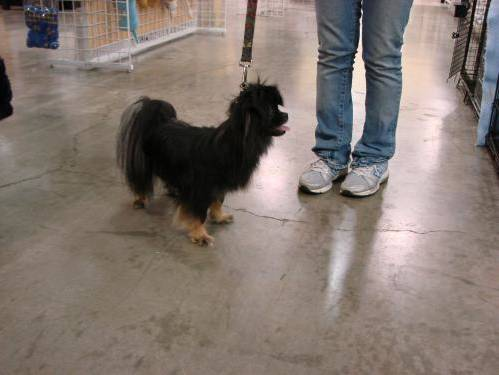

In [ ]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

## Building Model

In [ ]:
# we will start by preparing data

# Let's first create a valid folder with subdirectory of cats and dogs
from sklearn.model_selection import train_test_split
from shutil import move

data_dir="/content/dogs_vs_cats"
valid_dir=os.path.join(data_dir,"valid")

if not os.path.exists(valid_dir):
  os.makedirs(valid_dir)
  os.makedirs(os.path.join(valid_dir,"cats"))
  os.makedirs(os.path.join(valid_dir,"dogs"))




In [ ]:
def split_data(source_dir,target_dir,split_ratio=0.8):
  all_files=os.listdir(source_dir)
  images=[os.path.join(source_dir,f) for f in all_files if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg")]
  _,valid_files=train_test_split(images,test_size=split_ratio,random_state=42)

  for f in valid_files:
    if os.path.basename(f).startswith("cat"):
      move(f,os.path.join(valid_dir,"cats"))
    else:
      move(f,os.path.join(valid_dir,"dogs"))

In [ ]:
split_data("/content/dogs_vs_cats/test/cats", os.path.join(valid_dir, "cats"))
split_data("/content/dogs_vs_cats/test/dogs", os.path.join(valid_dir, "dogs"))

In [ ]:
os.path.join(valid_dir, "cats")

'/content/dogs_vs_cats/valid/cats'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
batch_size=20

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255) # for test data only rescaling would be perfect!

train_generator=train_datagen.flow_from_directory("/content/dogs_vs_cats/train",
 target_size=(150,150),
 batch_size=batch_size,
 class_mode='binary')

valid_generator=test_datagen.flow_from_directory("/content/dogs_vs_cats/valid",
 target_size=(150,150),
 batch_size=batch_size,
 class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    "/content/dogs_vs_cats/test",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)









Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Getting Class Labels

In [ ]:
print(f' Training class lebels:{train_generator.class_indices}')
print(f' Validation class lebels:{valid_generator.class_indices}')


 Training class lebels:{'cats': 0, 'dogs': 1}
 Validation class lebels:{'cats': 0, 'dogs': 1}


In [ ]:
# function to plot images and their labels

def generator_img_plotter(generator,num_img=4):
  images,labels=next(generator)
  fig,axes=plt.subplots(1,num_img,figsize=(20,20))
  for img,label,ax in zip(images,labels,axes):
    ax.imshow(img)
    class_labels=dict((v,k) for k,v in generator.class_indices.items())
    ax.set_title(class_labels[int(label)])
    ax.axis('off')
  plt.tight_layout()
  plt.show()

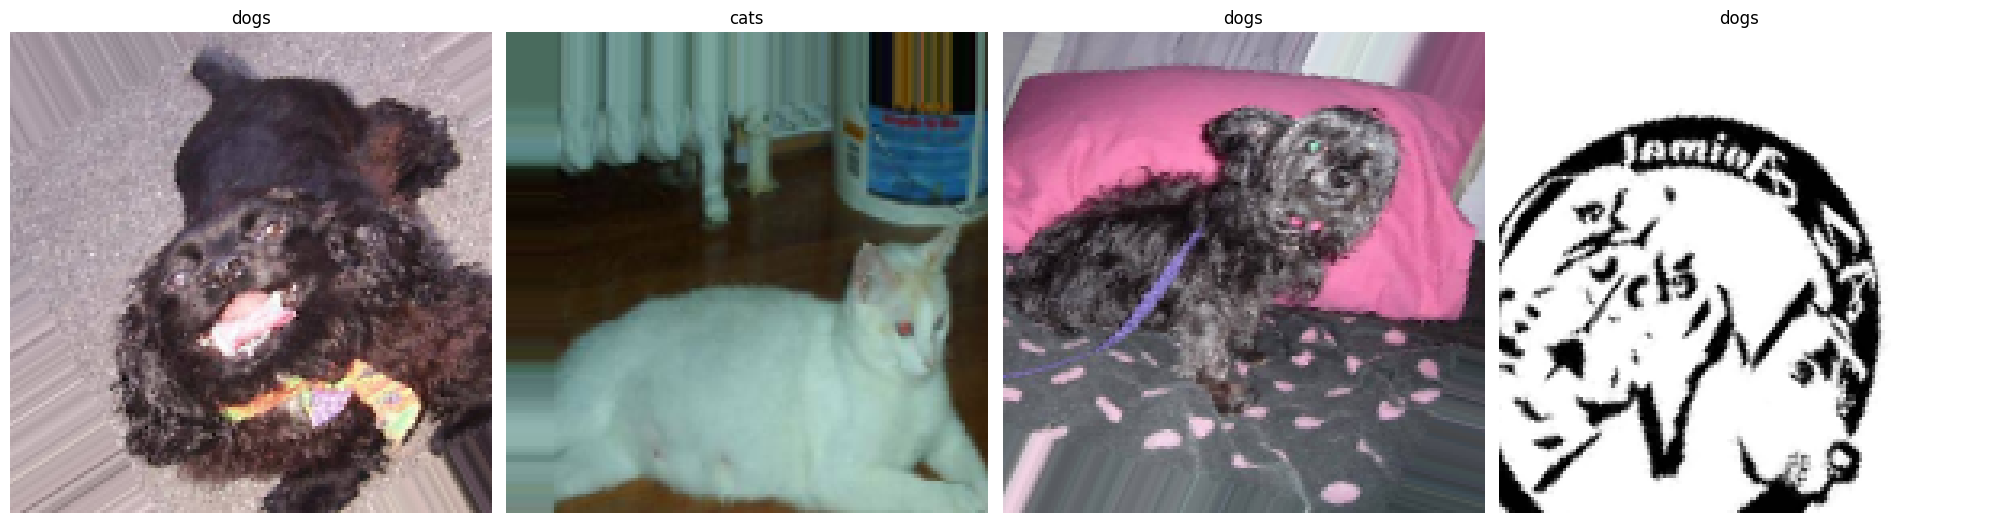

In [ ]:
generator_img_plotter(train_generator, num_img=4)


In [ ]:
# Now to see augmented data:

img=load_img('dogs_vs_cats/train/cats/cat.0.jpg')
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0

for batch in train_datagen.flow(x,batch_size=1,save_to_dir='preview',save_prefix='cat',save_format='jpeg'):
  i+=1
  if i>20:
    break


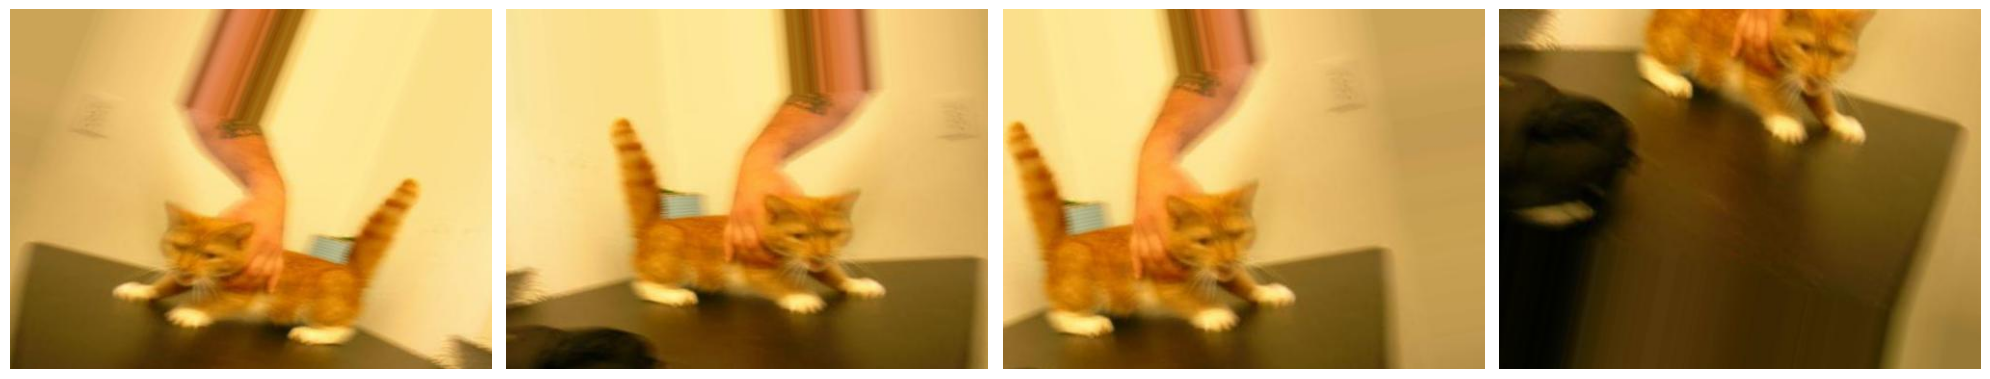

In [ ]:
contents=os.listdir("/content/preview")
fig,axes=plt.subplots(1,4,figsize=(20,20))
for ax,img_name in zip(axes,contents):
  img_path = os.path.join("/content/preview", img_name)
  img=Image.open(img_path)
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
train_generator.reset()

## Now we will build a CNN Model

In [ ]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# File path for the model checkpoint
ckpp=os.path.join("/content","cppf")
if not os.path.exists(ckpp):
  os.makedirs(ckpp)
name='Custom_CNN_model.keras'
chk_path=os.path.join(ckpp,name)
chk_path

'/content/cppf/Custom_CNN_model.keras'

'/content/cppf'

## Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger

checkpoint=ModelCheckpoint(filepath=chk_path,
                           save_best_only=True,
                           verbose=1,
                           mode='min',
                           monitor='val_loss')
earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)
csv_logger = CSVLogger(os.path.join(ckpp,'training.log'))

callbacks=[checkpoint,earlystop,reduce_lr,csv_logger]

In [ ]:
train_steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps_epoch = valid_generator.samples // valid_generator.batch_size
test_steps_epoch = test_generator.samples // test_generator.batch_size

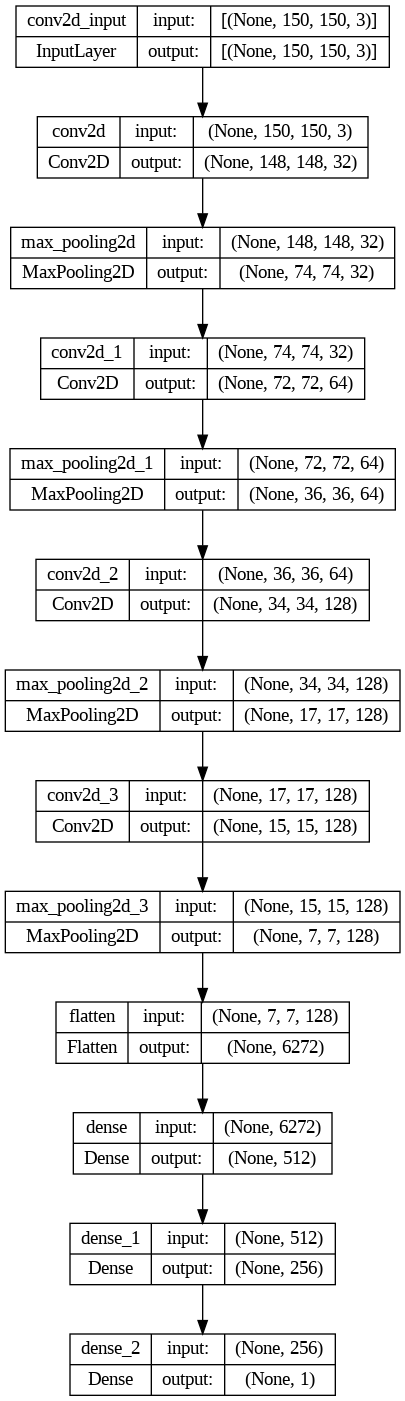

In [ ]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=validation_steps_epoch,
    callbacks=callbacks,
)

Epoch 1/10
1000/1000 [==============================] - ETA: 0s - loss: 0.6394 - accuracy: 0.6349
Epoch 1: val_loss improved from 0.63033 to 0.59731, saving model to /content/cppf/Custom_CNN_model.keras
1000/1000 [==============================] - 1142s 1s/step - loss: 0.6394 - accuracy: 0.6349 - val_loss: 0.5973 - val_accuracy: 0.6848 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.6778
Epoch 2: val_loss improved from 0.59731 to 0.51939, saving model to /content/cppf/Custom_CNN_model.keras
1000/1000 [==============================] - 1129s 1s/step - loss: 0.5980 - accuracy: 0.6778 - val_loss: 0.5194 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.7178
Epoch 3: val_loss improved from 0.51939 to 0.47510, saving model to /content/cppf/Custom_CNN_model.keras
1000/1000 [==============================] - 1134s 1s/step - loss: 0.5553 - accuracy: 0.7178 - 

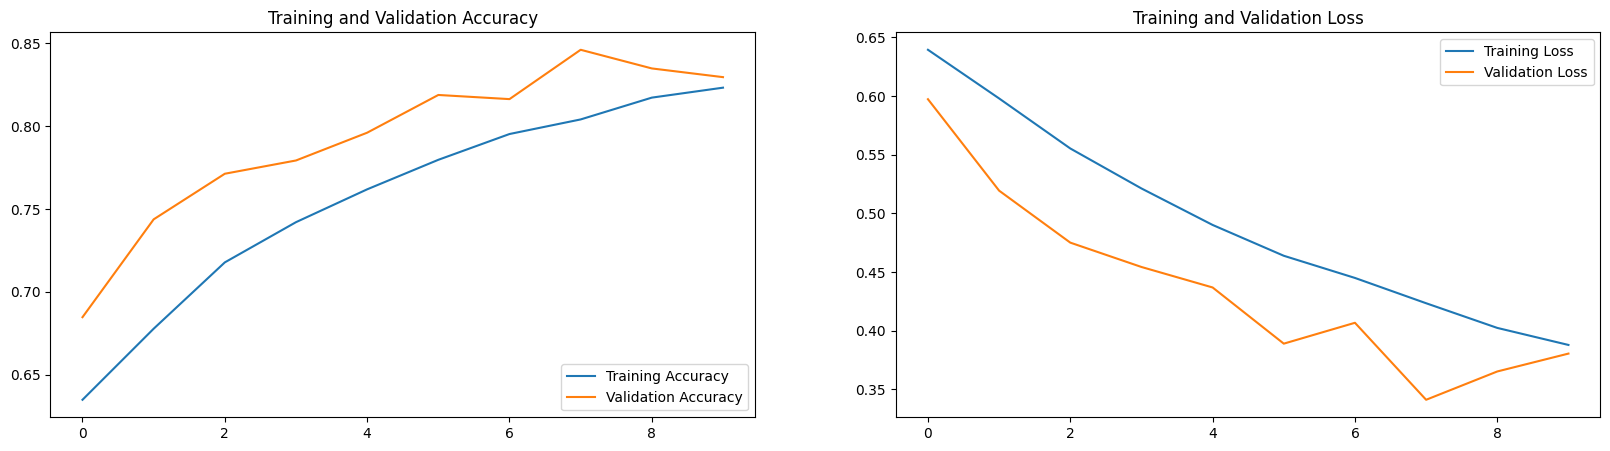

In [ ]:
# now we will plot Training and validation accuracy and Training and validation loss

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(len(acc))
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



10

## Making Test Predictions

In [ ]:
probab=model.predict(test_generator,steps=np.ceil(test_generator.samples/test_generator.batch_size))

50/50 [==============================] - 16s 304ms/step


In [ ]:
test_generator.reset()

true_classes = test_generator.classes


predicted_classes = (probab > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

## plotting Confusion Matrix

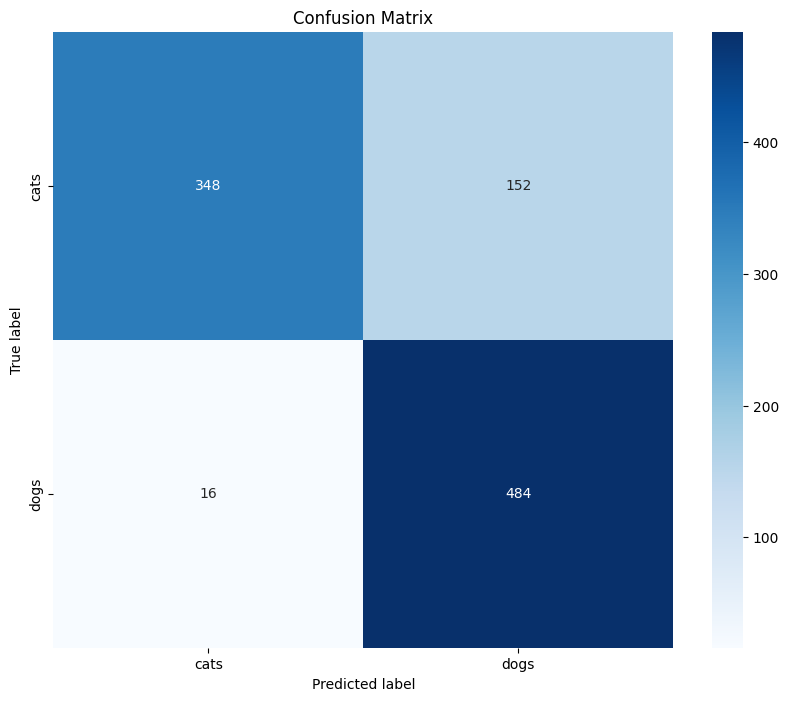

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1/1 [==============================] - 0s 63ms/step


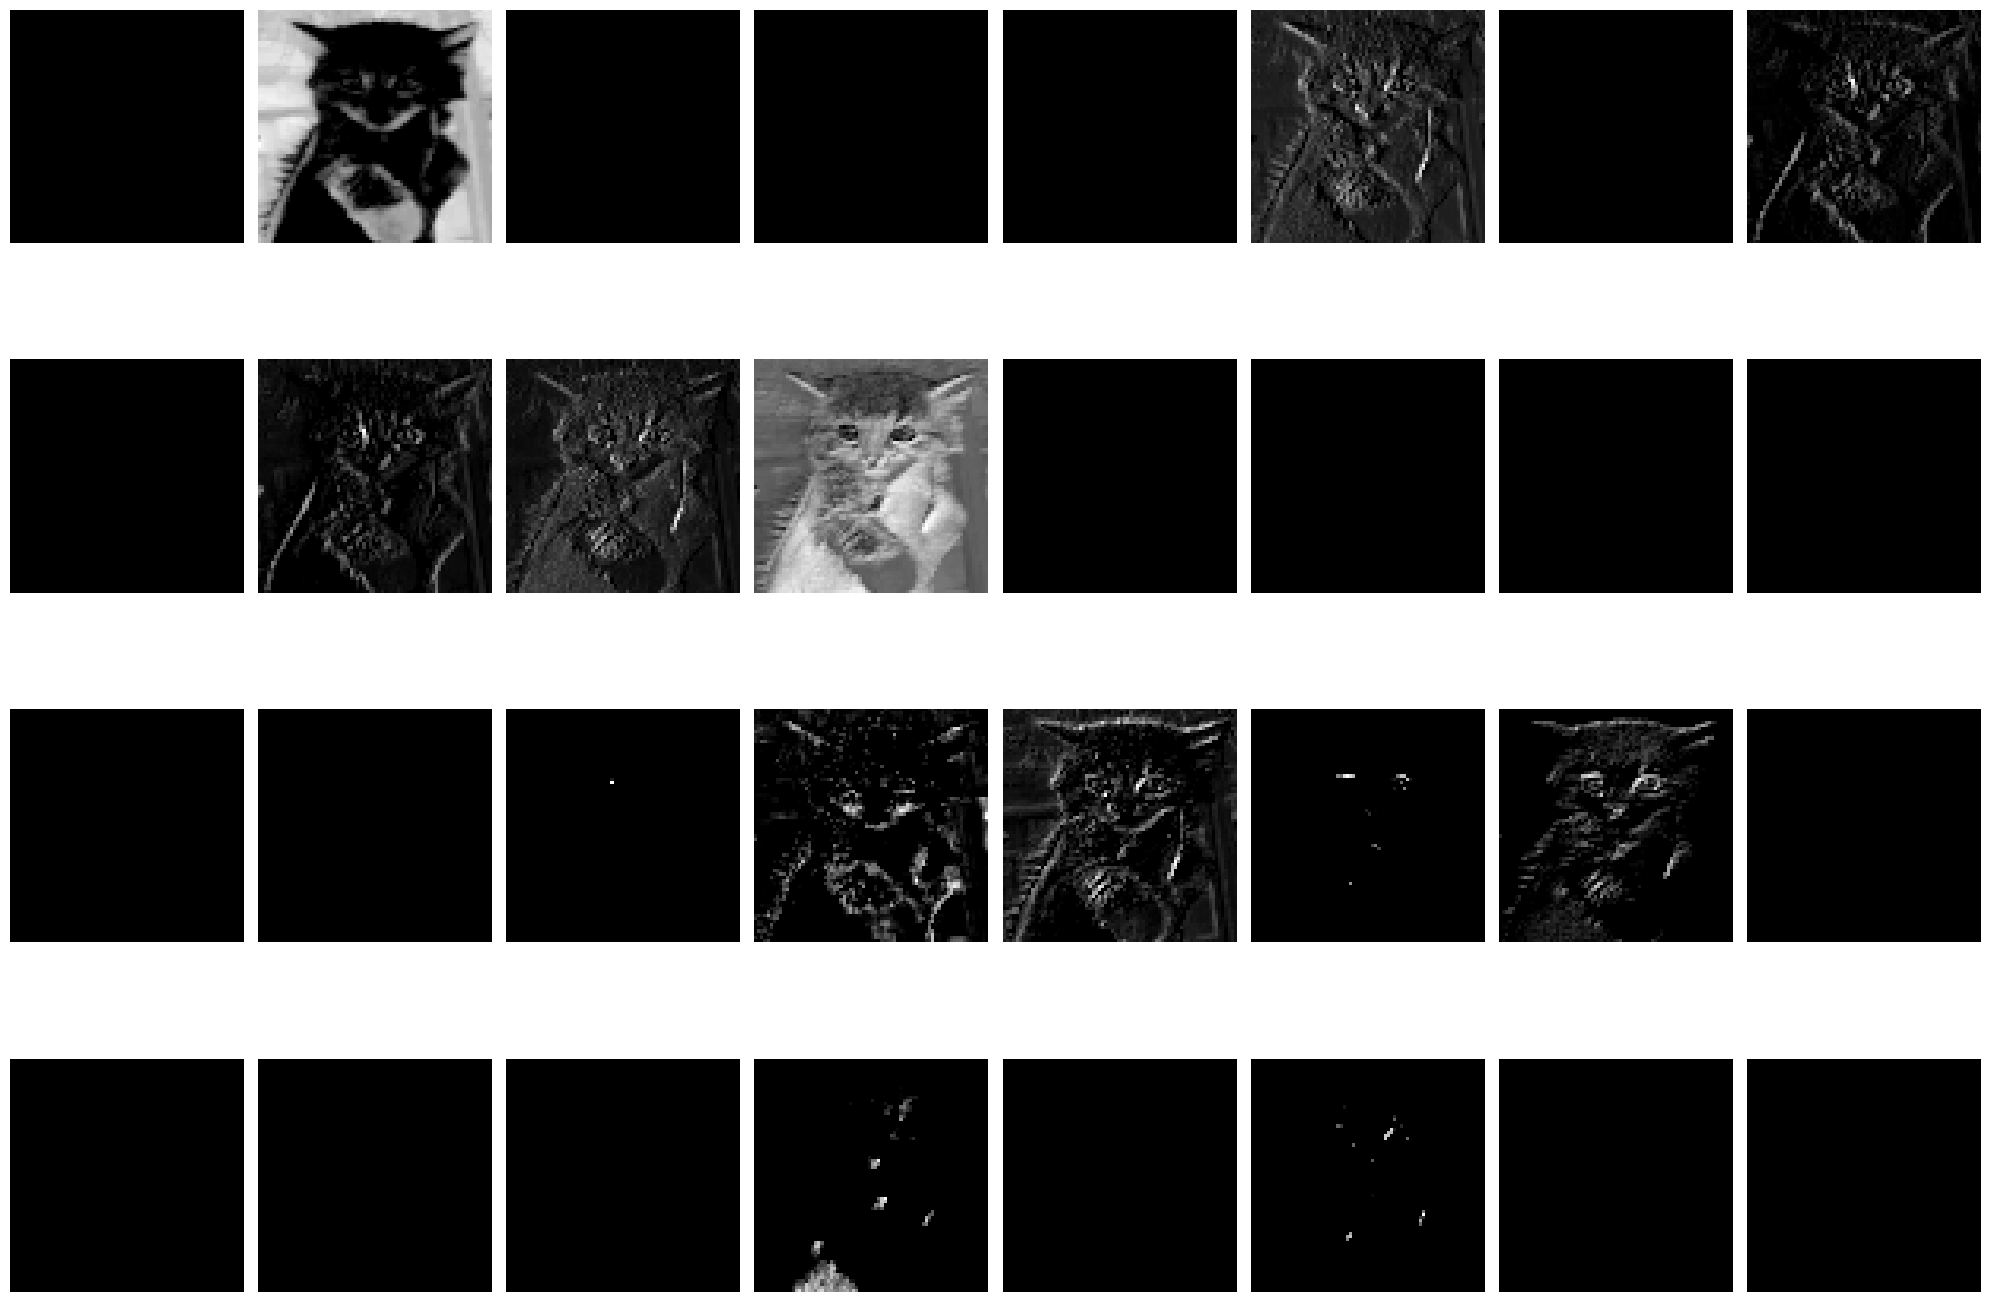

In [ ]:

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()